### Linear Regression
### Dataset:seaborn.tips
### Model :Simple Linear Regression


In [3]:
import seaborn as sns
import pandas as pd

#1.Data collection

df=sns.load_dataset("tips")
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:

#2.Understanding the dataset
df.info()

#Statistical information
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


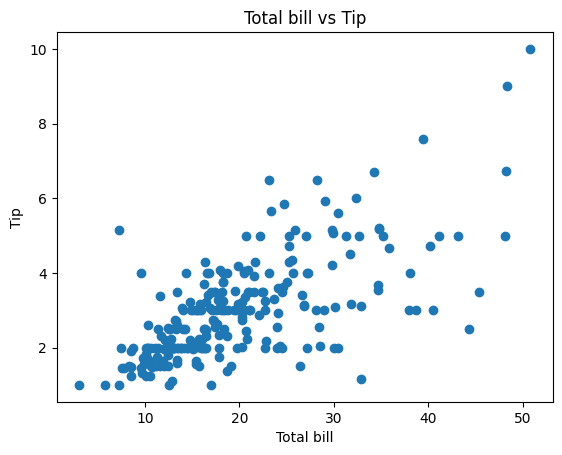

In [ ]:
#Relationship check 
#Before using any model , we must confirm relationship..?
import matplotlib.pyplot as plt

plt.scatter(df['total_bill'],df['tip'])
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.title('Total bill vs Tip')
plt.show()




### Observations:
1.As the bill increases tip increases
2.Relationship = Strainght line(we can use linear regression)


In [ ]:
#4. Features & Target Separation
# (Input variables always 2D)
x=df[['total_bill']]
y=df["tip"]


In [ ]:
#5. Train-test split -> To perform well on unseen data
# 80% -Training data, 20% Test data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


###  6.Feature Standardization 
Why??      
1. Compare the Co-effeicients fairly
2. Avoid the Domainance of Large values
3. Prepare for Lasso/Ridge 
           

In [16]:

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train) #scaling(mean,std)
x_test_scaled=scaler.transform(x_test)

# 1.Fit only on training data
# 2.Prevents the data leakage

### Train linear regression model


In [17]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train_scaled,y_train)
print("Co-efficient (m) : ",model.coef_)
print("Intercept (c) : ",model.intercept_)



Co-efficient (m) :  [0.93571714]
Intercept (c) :  3.0877948717948724


### 8.Model Evaluation


In [19]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

y_pred=model.predict(x_test_scaled)
r2=r2_score(y_test,y_pred)
print("R2 score : ",r2)

mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("MSE : ",mse)
print("RMSE : ",rmse)

R2 score :  0.5449381659234664
MSE :  0.5688142529229538
RMSE :  0.7541977545199626


### 9.Visualizing the best fit line

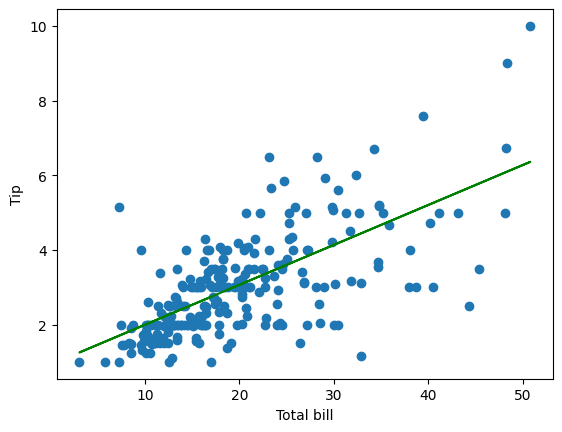

In [ ]:
plt.scatter(x,y)
plt.plot(x,model.predict(scaler.transform(x)),color="red")
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.title('Linear Regression best fit line')
plt.show()

### Input-output real time

In [ ]:
bill_amount=float(input("Enter the bill amount: "))
bill_scaled=scaler.transform([[bill_amount]])
predict_tip=model.predict(bill_scaled)
print(f'Prdeicted Tip: {predict_tip[0]: .2f}')


Prdeicted Tip: , 251.76


c:\Users\RISHITHA SRIJA\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
